<a href="https://colab.research.google.com/github/ArinaYuhimenko/HW-Python/blob/main/Yuhimenko_Python2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №2


Перед вами датасет с данными о вреде курения


Структура данных:

1. **gender**: Пол пациента
2. **age**: Возраст пациента
3. **hypertension**: Наличие гипертонии у пациента 1 - есть, 0 - не наблюдалось
4. **heart_disease**: Наличие у пациента болезней связанных с сердцем 1 - есть, 0 - здоров
5. **ever_married**: Брак - (Состоял в браке/ холост)
6. **work_type**: Работ - Ребенок(children), Госслужащий(Govt_jov), Никогда не работал(Never_worked), Самозанятый(self-employed) или Скрыто(private)
7. **Residence_type**: место работы городская среда(Urban)/удаленка или за городом(Rural)
8. **avg_glucose_level**: средний уровень глюкозы в крови
9. **bmi**: индекс массы тела
10. **smoking_status**: Пациент курит(Иногда, всегда, время от времени или Unknown - неизвестно)
11. **stroke**: Перенесенный инсульт (1 - пациент перенес инсульт, 0 - инсульта не было) - *ваш target*

## Ваша задача

№1 Восстановить целостностью данных, реализовать функцию позволяющие выполнять заполнение данных по среднему или по медианному значению в Series. 

1.  Заполнить пропуски
2.  Убрать дубликаты
3.  Убрать некорректные данные и.т.п.


№2 Построить baseline-модель, попытаться выбить лучший скор (сравнить несколько моделей)

№3 Сделать визуализацию для мини-исследования о вреде курения с разбивкой по половой принадлежности пациентов с помощью pandas, matplotlib, seaborn, plotly и других инструментов.

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [2]:
url = 'https://drive.google.com/file/d/1He5GI5_Gd8uXYfeETLBISQ5BszX0o4pU/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url,names=['index','gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'])
data = data.drop('index',axis=1)

In [4]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,NaN,formerly smoked,1
3,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
4,Male,80.0,0.0,1.0,Yes,Private,NaN,105.92,32.5,never smoked,1


In [5]:
data = data.drop_duplicates() #удаление строк с повторяющимися значениями во всех столбцах
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,NaN,formerly smoked,1
3,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
4,Male,80.0,0.0,1.0,Yes,Private,NaN,105.92,32.5,never smoked,1
5,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1


In [6]:
data = data.drop(index=[0]) #удаляем первую строку, т.к. это повторение названий столбцов
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,NaN,formerly smoked,1
3,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
4,Male,80.0,0.0,1.0,Yes,Private,NaN,105.92,32.5,never smoked,1
5,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
6,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
data = data.reset_index(drop=True)  #сбросим старый индекс и установим новый
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,NaN,formerly smoked,1
1,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0.0,1.0,Yes,Private,NaN,105.92,32.5,never smoked,1
3,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             5106 non-null   object
 1   age                4963 non-null   object
 2   hypertension       4903 non-null   object
 3   heart_disease      4282 non-null   object
 4   ever_married       5106 non-null   object
 5   work_type          4773 non-null   object
 6   Residence_type     4302 non-null   object
 7   avg_glucose_level  4622 non-null   object
 8   bmi                4167 non-null   object
 9   smoking_status     5106 non-null   object
 10  stroke             5106 non-null   object
dtypes: object(11)
memory usage: 438.9+ KB


In [9]:
data.dtypes

gender               object
age                  object
hypertension         object
heart_disease        object
ever_married         object
work_type            object
Residence_type       object
avg_glucose_level    object
bmi                  object
smoking_status       object
stroke               object
dtype: object

In [10]:
cleanup_nums = {"gender":     {"Male": 1, "Female": 0, "Other": 2},
                "ever_married": {"Yes": 1, "No": 0},
                "work_type": {"children": 0, "Govt_job": 1, "Never_worked": 2, "Self-employed": 3, "Private": 4},
                "Residence_type": {"Urban": 1, "Rural": 0},
                "smoking_status": {"formerly smoked": 0, "smokes": 1, "never smoked": 2, "Unknown": 3}}
                

In [11]:
data = data.replace(cleanup_nums)
data.head(100)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0.0,1.0,1,4.0,1.0,228.69,NaN,0,1
1,0,61.0,0.0,0.0,1,3.0,0.0,202.21,NaN,2,1
2,1,80.0,0.0,1.0,1,4.0,NaN,105.92,32.5,2,1
3,0,49.0,0.0,0.0,1,4.0,1.0,171.23,34.4,1,1
4,0,79.0,1.0,0.0,1,3.0,0.0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
95,0,78.0,0.0,NaN,1,4.0,0.0,NaN,32.3,2,1
96,0,70.0,0.0,0.0,1,3.0,0.0,76.34,NaN,0,1
97,1,58.0,0.0,NaN,1,4.0,0.0,NaN,31.4,1,1
98,1,57.0,1.0,NaN,1,NaN,NaN,NaN,NaN,0,1


In [12]:
data.dtypes

gender                 int64
age                   object
hypertension          object
heart_disease         object
ever_married           int64
work_type            float64
Residence_type       float64
avg_glucose_level     object
bmi                   object
smoking_status         int64
stroke                object
dtype: object

In [13]:
data.info

<bound method DataFrame.info of       gender   age hypertension heart_disease  ever_married  work_type  \
0          1  67.0          0.0           1.0             1        4.0   
1          0  61.0          0.0           0.0             1        3.0   
2          1  80.0          0.0           1.0             1        4.0   
3          0  49.0          0.0           0.0             1        4.0   
4          0  79.0          1.0           0.0             1        3.0   
...      ...   ...          ...           ...           ...        ...   
5101       0  80.0          1.0           0.0             1        4.0   
5102       0  81.0          0.0           0.0             1        3.0   
5103       0  35.0          0.0           0.0             1        3.0   
5104       1  51.0          0.0           0.0             1        4.0   
5105       0  44.0          0.0           0.0             1        1.0   

      Residence_type avg_glucose_level   bmi  smoking_status stroke  
0        

In [14]:
data = data.astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [15]:
col = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']

In [16]:
def sr(data,col):
  for i in col:
    mean = data[i].mean()
    data[i] = data[i].fillna(value=round(mean))
  return data

In [17]:
data = sr(data,col)   #заполняем пропущенные данные

In [21]:
data.head(50)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0.0,1.0,1.0,4.0,1.0,228.69,29.0,0.0,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,29.0,2.0,1.0
2,1.0,80.0,0.0,1.0,1.0,4.0,1.0,105.92,32.5,2.0,1.0
3,0.0,49.0,0.0,0.0,1.0,4.0,1.0,171.23,34.4,1.0,1.0
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.0,2.0,1.0
5,1.0,81.0,0.0,0.0,1.0,4.0,1.0,186.21,29.0,0.0,1.0
6,1.0,74.0,1.0,1.0,1.0,3.0,0.0,70.09,29.0,2.0,1.0
7,0.0,69.0,0.0,0.0,0.0,4.0,1.0,94.39,22.8,2.0,1.0
8,0.0,59.0,0.0,0.0,1.0,4.0,0.0,76.15,29.0,3.0,1.0
9,0.0,78.0,0.0,0.0,1.0,4.0,1.0,58.57,24.2,3.0,1.0


In [22]:
data['stroke'].value_counts()   #классы являются несбалансированными

0.0    4857
1.0     249
Name: stroke, dtype: int64

In [23]:
st = data['stroke']
df = data.drop(labels=['stroke'],axis=1)

In [24]:
SGDC_clf = SGDClassifier()
SGDC_clf.fit(df,st)

SGDClassifier()

In [25]:
SGDC_preds = SGDC_clf.predict(df)
acc = accuracy_score(st, SGDC_preds)
print(f'Значение= {acc}')

Значение= 0.8681942812377595


In [27]:
st.mean()

0.04876615746180964

In [30]:
from collections import Counter
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(df, st)
print(sorted(Counter(y_resampled).items()))

[(0.0, 4813), (1.0, 4813)]


In [31]:
for i in X_resampled.columns:
  X_resampled[f'{i}'] = round(X_resampled[f'{i}'])

In [37]:
SGDC_clf.fit(df,st)
SGDC_preds = SGDC_clf.predict(df)
acc = accuracy_score(st, SGDC_preds)
print('Значение accuracy = {}'.format(acc))

Значение accuracy = 0.9512338425381903


In [38]:
X,y = X_resampled, y_resampled

X.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

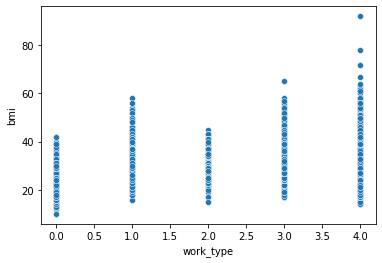

In [42]:
sns.scatterplot(data=X, x="work_type", y="bmi") 

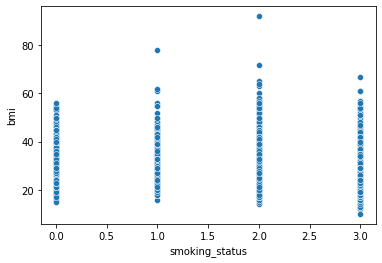

In [52]:
sns.scatterplot(data=X, x="smoking_status", y="bmi") 

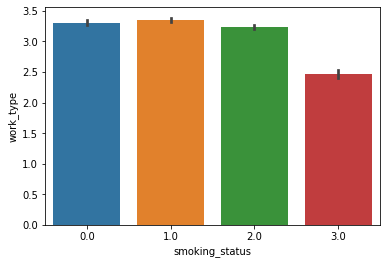

In [65]:
sns.barplot(data=X, x="smoking_status", y="work_type");

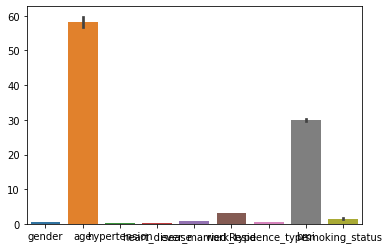

In [64]:
sns.barplot(data = X.groupby('avg_glucose_level').agg(np.mean))
